In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("./training_data_lowercase.csv", delimiter='\t', header=None, names=['label', 'text'])

In [14]:
df.head()

,label,text
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [16]:
print(X_test.head())
print()
print(y_test.head())

18499     release of house tax bill delayed until thursday
24785    confusion over trump's first talks with foreig...
27282    obama says chinese-led trade deal shows need f...
6151            former pastor turned teacher beat students
16785    breaking: south carolina senate caves: votes t...
Name: text, dtype: object

18499    1
24785    1
27282    1
6151     0
16785    0
Name: label, dtype: int64


In [17]:
X_train.head()

8891                                                    so
25115    final reckoning approaches for obama's high co...
26933    illinois budget talks fizzle amid partisan ent...
26971    clinton spokesman: ig report shows no clinton ...
11387    busted! nancy pelosi claims no meeting with ru...
Name: text, dtype: object

In [18]:
df['X_train'] = X_train
df['y_train'] = y_train

test_df = df.copy()
test_df['X_test'] = X_test
test_df['y_test'] = y_test

In [19]:
test_df.head()

,label,text,X_train,y_train,X_test,y_test
0,0,donald trump sends out embarrassing new year‚s...,NaN,NaN,donald trump sends out embarrassing new year‚s...,0.0
1,0,drunk bragging trump staffer started russian c...,drunk bragging trump staffer started russian c...,0.0,NaN,NaN
2,0,sheriff david clarke becomes an internet joke ...,sheriff david clarke becomes an internet joke ...,0.0,NaN,NaN
3,0,trump is so obsessed he even has obama‚s name ...,trump is so obsessed he even has obama‚s name ...,0.0,NaN,NaN
4,0,pope francis just called out donald trump duri...,NaN,NaN,pope francis just called out donald trump duri...,0.0


In [20]:
df.head()

,label,text,X_train,y_train
0,0,donald trump sends out embarrassing new year‚s...,NaN,NaN
1,0,drunk bragging trump staffer started russian c...,drunk bragging trump staffer started russian c...,0.0
2,0,sheriff david clarke becomes an internet joke ...,sheriff david clarke becomes an internet joke ...,0.0
3,0,trump is so obsessed he even has obama‚s name ...,trump is so obsessed he even has obama‚s name ...,0.0
4,0,pope francis just called out donald trump duri...,NaN,NaN


In [21]:
test_df = test_df.drop(columns=['label', 'text', 'X_train', 'y_train'])

In [22]:
test_df.head()

,X_test,y_test
0,donald trump sends out embarrassing new year‚s...,0.0
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,pope francis just called out donald trump duri...,0.0


In [23]:
test_df = test_df.dropna(subset=['X_test', 'y_test'])

In [24]:
test_df.head()

,X_test,y_test
0,donald trump sends out embarrassing new year‚s...,0.0
4,pope francis just called out donald trump duri...,0.0
6,fresh off the golf course,0.0
7,trump said some insanely racist stuff inside t...,0.0
8,former cia director slams trump over un bullying,0.0


## Data preprocessing

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/ankita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# tokenization
from nltk.tokenize import word_tokenize

def tokanize_data(sentence):
    if isinstance(sentence, str):
        words = word_tokenize(sentence)
        return ' '.join(words)
    else:
        return ''



In [27]:
# remove punctuation
# remove special character
# remove numbers
# remove single character
# remove single character from start
# Substitute multiple spaces with a single space
# Remove prefixed 'b'
import string
import re

def clean_text(sentence):
    clean_text = sentence.translate(str.maketrans('','', string.punctuation))
    cleaned_text = re.sub(r'[^\w\s]', '', clean_text)
    cleaned_text = re.sub(r'\d+', '', cleaned_text)
    cleaned_text = re.sub(r'\b\w{1}\b', '', cleaned_text)
    cleaned_text = re.sub(r'^\s*\w{1}\s*', '', cleaned_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    cleaned_text = re.sub(r'^b\s*', '', cleaned_text)
    return clean_text

In [28]:
# remove stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
def remove_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(sentence)
    cleaned_text = ' '.join(word for word in words if word not in stop_words)
    return cleaned_text

In [30]:
# lemmatization
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /Users/ankita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ankita/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(sentence):
    words = word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    cleaned_text = ' '.join(lemmatized_words)
    return cleaned_text

In [32]:
# keep only 2 columns to avoid confusion
df = df[['X_train', 'y_train']]

In [ ]:
def preprocess_text(df, column):
    df[column] = df[column].apply(tokanize_data)
    df[column] = df[column].apply(clean_text)
    df[column] = df[column].apply(remove_stopwords)
    df[column] = df[column].apply(apply_lemmatization)
    return df

In [34]:
df = preprocess_text(df, 'X_train')

In [35]:
df.head()

,X_train,y_train
0,,NaN
1,drink brag trump staffer start russian collusi...,0.0
2,sheriff david clarke become internet joke thre...,0.0
3,trump obsess even obama‚s name cod website image,0.0
4,,NaN


## Feature extraction

In [36]:
print("Number of NaN values in y:", df['y_train'].isna().sum())

Number of NaN values in y: 6831


In [37]:
df = df.dropna(subset=['y_train'])

In [38]:
# using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(df['X_train'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [39]:
tfidf_df.head()

,00,0149,02,025,0330,0930,10,100,1000,10000,...,zuckerberg,zulia,zuma,zummar,zurich,éblacklivesmatter,îfor,îing,îpence,øqu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model training


In [40]:
# using logistic regression
from sklearn.linear_model import LogisticRegression

In [41]:
X = tfidf_df
y = df['y_train']

print(X.head())
print()
print(y.head())

    00  0149   02  025  0330  0930   10  100  1000  10000  ...  zuckerberg  \
0  0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0    0.0  ...         0.0   
1  0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0    0.0  ...         0.0   
2  0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0    0.0  ...         0.0   
3  0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0    0.0  ...         0.0   
4  0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0    0.0  ...         0.0   

   zulia  zuma  zummar  zurich  éblacklivesmatter  îfor  îing  îpence  øqu  
0    0.0   0.0     0.0     0.0                0.0   0.0   0.0     0.0  0.0  
1    0.0   0.0     0.0     0.0                0.0   0.0   0.0     0.0  0.0  
2    0.0   0.0     0.0     0.0                0.0   0.0   0.0     0.0  0.0  
3    0.0   0.0     0.0     0.0                0.0   0.0   0.0     0.0  0.0  
4    0.0   0.0     0.0     0.0                0.0   0.0   0.0     0.0  0.0  

[5 rows x 15626 columns]

1    0.0
2    0.0
3    0.0
5    0.0
9    0

In [42]:
data_train, data_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = LogisticRegression(max_iter=1000)
model.fit(data_train,label_train)

LogisticRegression(max_iter=1000)

In [44]:
y_pred = model.predict(data_test)

In [45]:
from sklearn.metrics import accuracy_score, classification_report

In [46]:
# Evaluate the model
print("Accuracy:", accuracy_score(label_test, y_pred))
print("Classification Report:\n", classification_report(label_test, y_pred))

Accuracy: 0.937419945105215
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      2821
         1.0       0.93      0.94      0.94      2644

    accuracy                           0.94      5465
   macro avg       0.94      0.94      0.94      5465
weighted avg       0.94      0.94      0.94      5465



## Now predict X_test and y_test
### X_test y_test

In [47]:
test_df.head()

,X_test,y_test
0,donald trump sends out embarrassing new year‚s...,0.0
4,pope francis just called out donald trump duri...,0.0
6,fresh off the golf course,0.0
7,trump said some insanely racist stuff inside t...,0.0
8,former cia director slams trump over un bullying,0.0


In [48]:
test_df = preprocess_text(test_df, 'X_test')

In [49]:
test_df.head()

,X_test,y_test
0,donald trump send embarrass new year‚s eve mes...,0.0
4,pope francis call donald trump christmas speech,0.0
6,fresh golf course,0.0
7,trump say insanely racist stuff inside oval of...,0.0
8,former cia director slam trump un bully,0.0


In [50]:
tfidf_new_matrix = tfidf_vectorizer.transform(test_df['X_test'])

In [51]:
tfidf_new_df = pd.DataFrame(tfidf_new_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [52]:
y_pred_new = model.predict(tfidf_new_df)

In [53]:
# Evaluate the model
print("Accuracy:", accuracy_score(test_df['y_test'], y_pred_new))
print("Classification Report:\n", classification_report(test_df['y_test'], y_pred_new))

Accuracy: 0.9329527155614112
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      3529
         1.0       0.92      0.94      0.93      3302

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



In [54]:
test_df['predicted_results'] = y_pred_new

In [55]:
test_df.head(50)

,X_test,y_test,predicted_results
0,donald trump send embarrass new year‚s eve mes...,0.0,0.0
4,pope francis call donald trump christmas speech,0.0,0.0
6,fresh golf course,0.0,1.0
7,trump say insanely racist stuff inside oval of...,0.0,0.0
8,former cia director slam trump un bully,0.0,0.0
17,mueller spokesman fcked donald trump‚s christmas,0.0,0.0
23,cnn call democrat represent alabama senate fir...,0.0,1.0
33,trump care trump recognize jerusalem today,0.0,0.0
34,trump support coal ceo upset trump wipe ‚thous...,0.0,1.0
46,break michael flynn crack ‚ testify mueller trump,0.0,0.0


### Confusion matrix

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

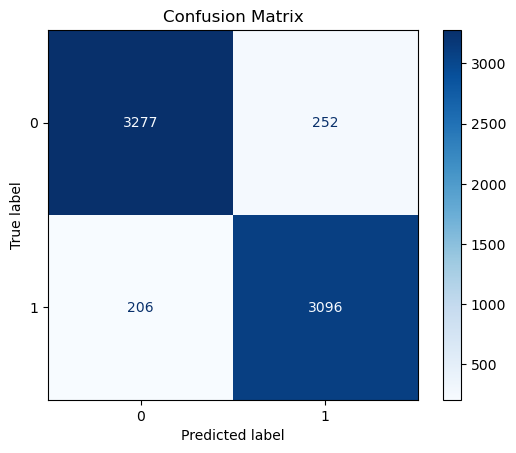

In [57]:
# confusion matrix
cm = confusion_matrix(test_df['y_test'], y_pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Plot a bar graph

In [58]:
# Calculate accuracy for training data
train_accuracy = accuracy_score(label_test, y_pred) 

# Calculate accuracy for test data
test_accuracy = accuracy_score(test_df['y_test'], y_pred_new)

# Print accuracies
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.94
Test Accuracy: 0.93


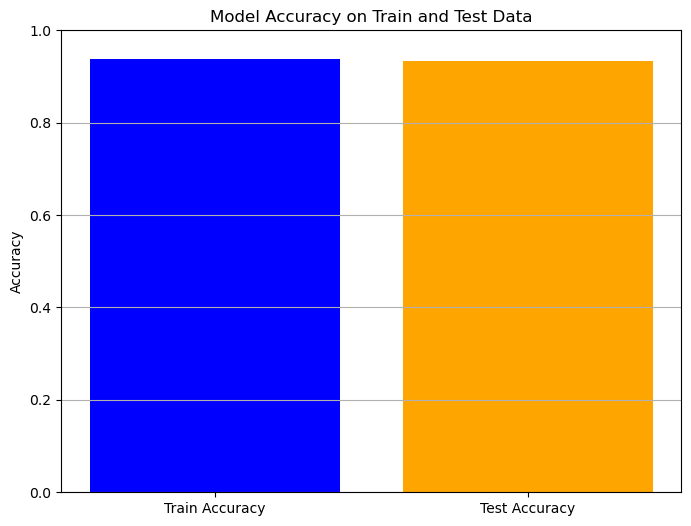

In [59]:
# Data for plotting
accuracies = [train_accuracy, test_accuracy]
labels = ['Train Accuracy', 'Test Accuracy']

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Train and Test Data')
plt.grid(axis='y')

# Display the plot
plt.show()

### Save model

In [ ]:
import joblib

#joblib.dump(model, 'nlp_text_classification.pkl')

### Save Data preprocessing 

In [61]:
import pickle

In [62]:
# Save the function to a pickle file
# with open("preprocess_text_function.pkl", "wb") as file:
#     pickle.dump(preprocess_text, file)

### Save TfidfVectorizer

In [ ]:
# Save the vectorizer using joblib
#joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.joblib")

##### TODO
### - load data in df 
###### df_new = pd.read_csv("./training_data_lowercase.csv", delimiter='\t', header=None, names=['label', 'text'])
### - use below function to preprocess your data in df
######  processed_df = preprocess_text(df_new, column='text')
### - transform new text data processed_df['text']
##### - load saved TfidfVectorizer
###### X_test_transformed = loaded_vectorizer.transform(processed_df['text'])

1. load data 
2. load preprocessed function
3. load feature extraction
4. load the trained model
5. apply to the new datasets

### Load test data 

In [86]:
df_new_test = pd.read_csv("./data_test_news_only.csv")

In [87]:
df_new_test.head()

,Unnamed: 0,news
0,0,Southside Chicago Blacks Fight Against Liberal...
1,1,WIFE OF LIONS QUARTERBACK Matthew Stafford Jus...
2,2,HEY CNN‚Ä¶REMEMBER OBAMA‚ÄôS Notorious ‚ÄúFrid...
3,3,BREAKING NEWS: SEBASTIAN GORKA OUT‚Ä¶Are Ivank...
4,4,First Grader ‚ÄúInvestigated‚Äù in Principal‚Ä...


In [ ]:
# df_new_test = df_new_test.loc[:, 'news']

In [ ]:
# df_new_test.head()

0    Southside Chicago Blacks Fight Against Liberal...
1    WIFE OF LIONS QUARTERBACK Matthew Stafford Jus...
2    HEY CNN‚Ä¶REMEMBER OBAMA‚ÄôS Notorious ‚ÄúFrid...
3    BREAKING NEWS SEBASTIAN GORKA OUT‚Ä¶Are Ivanka...
4    First Grader ‚ÄúInvestigated‚Äù Principal‚Äôs ...
Name: news, dtype: object

### Load saved preprocessed function

In [88]:
# Load the function
with open("./Saved Models/preprocess_text_function.pkl", "rb") as file:
    preprocess_text = pickle.load(file)

In [89]:
# Use the function on a DataFrame
processed_df = preprocess_text(df_new_test, column='news') 

In [90]:
processed_df

,Unnamed: 0,news
0,0,Southside Chicago Blacks Fight Against Liberal...
1,1,WIFE OF LIONS QUARTERBACK Matthew Stafford Jus...
2,2,HEY CNN‚Ä¶REMEMBER OBAMA‚ÄôS Notorious ‚ÄúFrid...
3,3,BREAKING NEWS SEBASTIAN GORKA OUT‚Ä¶Are Ivanka...
4,4,First Grader ‚ÄúInvestigated‚Äù Principal‚Äôs ...
...,...,...
9978,9978,Fully commit NATO back new US approach Afghani...
9979,9979,LexisNexis withdraw two products Chinese market
9980,9980,Minsk cultural hub become authorities
9981,9981,Vatican upbeat possibility Pope Francis visit ...


### Load save TfidfVectorizer

In [91]:
# Load the vectorizer
loaded_vectorizer = joblib.load("./Saved Models/tfidf_vectorizer.joblib")

In [92]:
# Transform new text data
X_test_transformed = loaded_vectorizer.transform(processed_df['news']) # your_text_column

### Load saved Model

In [93]:
saved_model = joblib.load('./Saved Models/nlp_text_classification.pkl')

In [94]:
X_test_transformed_df = pd.DataFrame(X_test_transformed.toarray(), columns=loaded_vectorizer.get_feature_names_out())
y_pred_new = saved_model.predict(X_test_transformed_df)
# Evaluate the model
# print("Accuracy:", accuracy_score(processed_df['y_train'], y_pred_new)) # your_label_column
# print("Classification Report:\n", classification_report(processed_df['y_train'], y_pred_new)) # your_label_column
processed_df['predicted_results'] = y_pred_new
processed_df.head(50)

,Unnamed: 0,news,predicted_results
0,0,Southside Chicago Blacks Fight Against Liberal...,0.0
1,1,WIFE OF LIONS QUARTERBACK Matthew Stafford Jus...,0.0
2,2,HEY CNN‚Ä¶REMEMBER OBAMA‚ÄôS Notorious ‚ÄúFrid...,0.0
3,3,BREAKING NEWS SEBASTIAN GORKA OUT‚Ä¶Are Ivanka...,0.0
4,4,First Grader ‚ÄúInvestigated‚Äù Principal‚Äôs ...,0.0
5,5,LOL LEFTIST RAG PUBLISHES Story About How Pres...,0.0
6,6,WHOA Did ‚ÄúWhite Supremacist‚Äù Who Organized...,0.0
7,7,WATCH BLACK SPORTS HOST BLASTS White ESPN Spor...,0.0
8,8,BOXING LEGEND GEORGE FOREMAN Reveals How Trump...,0.0
9,9,AIRPORT PASSENGER ‚ÄúPAT DOWNS‚Äù Get More Int...,0.0


### Save to CSV

In [95]:
# Save the DataFrame to a CSV file
processed_df.to_csv('predicted_data.csv', index=False) 